#### **Importar librerías relevantes y consumir API de Kaggle**

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Download the dataset
dataset = "uom190346a/sleep-health-and-lifestyle-dataset"
api.dataset_download_files(dataset, path='./', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset


#### **Descripción general de los datos.**

* ¿Qué columnas tenemos?
* ¿Qué valores toman las variables categóricas?
* ¿Existen valores nulos?
* Estadísticos de variables numéricas

In [31]:
data = pd.read_csv('./Sleep_health_and_lifestyle_dataset.csv', index_col=0)
data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [33]:
object_columns = data.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f"\nUnique values in {col}:")
    print(data[col].unique())


Unique values in Gender:
['Male' 'Female']

Unique values in Occupation:
['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

Unique values in BMI Category:
['Overweight' 'Normal' 'Obese' 'Normal Weight']

Unique values in Blood Pressure:
['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']

Unique values in Sleep Disorder:
[nan 'Sleep Apnea' 'Insomnia']


In [34]:
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


#### **Limpieza de la base de datos**

In [35]:
# Los únicos valores nulos de la columna 'Sleep Disorder' representan que no se tiene ningún desorden de sueño.
# Por lo tanto, se pueden reemplazar por "None" para indicar explícitamente la ausencia de desorden de sueño.
# Esto ayuda a mantener la consistencia de los datos y facilita el análisis posterior.

data['Sleep Disorder'] = data['Sleep Disorder'].fillna("None")

In [36]:
# Los valores de blood pressure están en el formato "systolic/diastolic". Se pueden separar en dos columnas.
# Es importante usar expand=True para que el método split expanda los resultados en dos columnas separadas.
# Sin expand=True, el resultado sería una sola columna con listas de valores.
# Convertimos a tipo int para poder realizar operaciones numéricas posteriormente.

data[['systolic_bp', 'diastolic_bp']] = (
    data['Blood Pressure']
    .str.split('/', expand=True)
    .astype(int)
    )

In [37]:
# pip install jinja2 matplotlib

data.describe().style.background_gradient(cmap='BuPu')

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,systolic_bp,diastolic_bp
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


#### Análisis de datos

**Correlación**  
En el contexto de análisis de datos con Pandas, el método corr() utiliza por defecto la varianza muestral (n-1). Esto es lo más apropiado porque:  

Trabajamos con una muestra:  

Nuestro dataset es una muestra de una población más grande
No tenemos acceso a todos los posibles datos sobre sueño y estrés
Estimación más conservadora:  

La varianza muestral (n-1) proporciona una estimación más conservadora
Ayuda a compensar la incertidumbre de trabajar con una muestra  

La fórmula completa del coeficiente de correlación de Pearson es:

$r = \frac{Cov(X,Y)}{\sigma_X \sigma_Y} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}} = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{(n-1)\sigma^2_X}\sqrt{(n-1)\sigma^2_Y}}$

Donde:

$Cov(X,Y)$ es la covarianza entre X e Y  
$\sigma_X$ es la desviación estándar de X  
$\sigma_Y$ es la desviación estándar de Y  
$\sigma^2_X$ es la varianza de X  
$\sigma^2_Y$ es la varianza de Y  
$n$ es el número de observaciones  

Varianzas:  
Varianza de X: $\sigma^2_X = \frac{1}{n-1}\sum_{i=1}^{n} (x_i - \bar{x})^2$  
Varianza de Y: $\sigma^2_Y = \frac{1}{n-1}\sum_{i=1}^{n} (y_i - \bar{y})^2$  
Esta fórmula muestra explícitamente cómo la correlación es la covarianza estandarizada por las desviaciones estándar (o raíces cuadradas de las varianzas) de ambas variables.

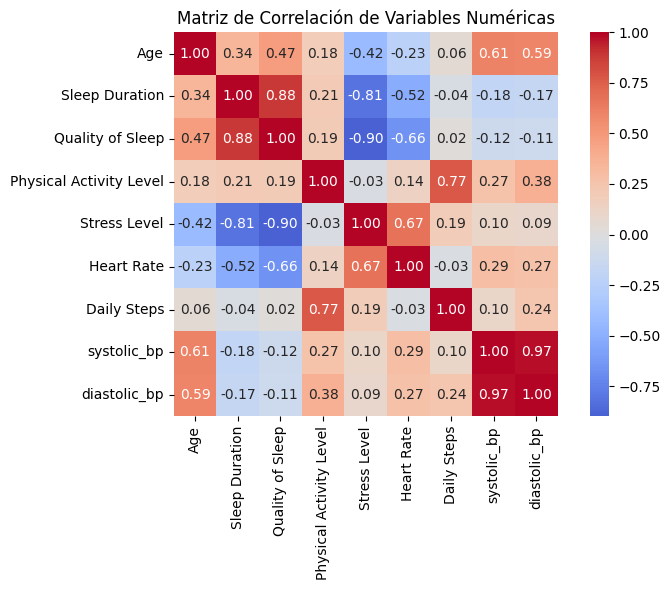

In [38]:
# Seleccionar solo las columnas numéricas
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Crear matriz de correlación
correlation_matrix = data[numeric_columns].corr()

# Crear un heatmap usando seaborn
plt.figure(figsize=(8 , 6))
sns.heatmap(correlation_matrix, 
            annot=True,          # Mostrar valores numéricos
            cmap='coolwarm',     # Esquema de colores
            center=0,            # Centro del mapa de colores
            fmt='.2f',           # Formato de números (2 decimales)
            square=True)         # Hacer las celdas cuadradas

plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()